In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping


import numpy as np

from matplotlib import pyplot as plt

In [2]:
BATCH_SIZE, TIMESTEPS, OUTPUTS, INPUT_DIM = 16, 64, 16, 1
N = 1024*BATCH_SIZE

def build_data():
    x = np.arange(0, TIMESTEPS+OUTPUTS)
    data = np.empty(shape=(N, TIMESTEPS+OUTPUTS, 1), dtype='float32')
    for i in range(N):
        A = 1. + np.random.random()
        delta = 1.e-2*np.random.random()
        w = 2.*np.pi/np.random.randint(1, TIMESTEPS//2)
        data[i, :, 0] = A*np.exp(-delta*x)*np.sin(w*x)
    return data[:, 0:TIMESTEPS, :], data[:, TIMESTEPS:, 0]
    
X_train, y_train = build_data()
X_test, y_test = build_data()

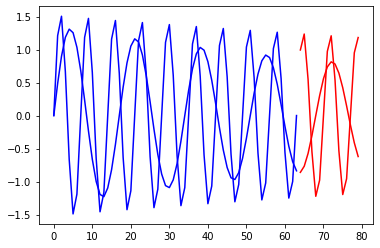

In [3]:
for _ in range(2):
    i = np.random.randint(0, N)
    plt.plot(np.arange(0, TIMESTEPS), X_train[i, :, 0], color='blue')
    plt.plot(np.arange(TIMESTEPS, TIMESTEPS+OUTPUTS), y_train[i, :], color='red')
plt.show()

In [4]:
x = Input(shape=(TIMESTEPS, INPUT_DIM))

UNITS = 16
y = LSTM(units=UNITS, return_sequences=True)(x)
y = LSTM(units=UNITS)(y)
y = Dense(OUTPUTS)(y)

model = Model(inputs=x, outputs=y)
model.compile('adam', loss='mae')  # mean absolute error
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 64, 16)            1152      
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense (Dense)                (None, 16)                272       
Total params: 3,536
Trainable params: 3,536
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=256, validation_split=0.2,
                    callbacks= [ EarlyStopping(monitor='val_loss', patience=16)], verbose=1)

Train on 13107 samples, validate on 3277 samples
Epoch 1/256
13107/13107 - 42s - loss: 0.3678 - val_loss: 0.2471
Epoch 2/256
13107/13107 - 36s - loss: 0.2075 - val_loss: 0.1890
Epoch 3/256
13107/13107 - 35s - loss: 0.1660 - val_loss: 0.1643
Epoch 4/256
13107/13107 - 35s - loss: 0.1509 - val_loss: 0.1481
Epoch 5/256
13107/13107 - 35s - loss: 0.1417 - val_loss: 0.1384
Epoch 6/256
13107/13107 - 35s - loss: 0.1360 - val_loss: 0.1356
Epoch 7/256
13107/13107 - 35s - loss: 0.1308 - val_loss: 0.1318
Epoch 8/256
13107/13107 - 36s - loss: 0.1287 - val_loss: 0.1278
Epoch 9/256
13107/13107 - 36s - loss: 0.1237 - val_loss: 0.1298
Epoch 10/256
13107/13107 - 35s - loss: 0.1223 - val_loss: 0.1209
Epoch 11/256
13107/13107 - 35s - loss: 0.1187 - val_loss: 0.1218
Epoch 12/256
13107/13107 - 35s - loss: 0.1164 - val_loss: 0.1192
Epoch 13/256
13107/13107 - 35s - loss: 0.1146 - val_loss: 0.1201
Epoch 14/256
13107/13107 - 35s - loss: 0.1123 - val_loss: 0.1215
Epoch 15/256
13107/13107 - 35s - loss: 0.1084 - va

In [6]:
loss = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
print('loss ', loss)

16384/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

loss  0.009333253770819283


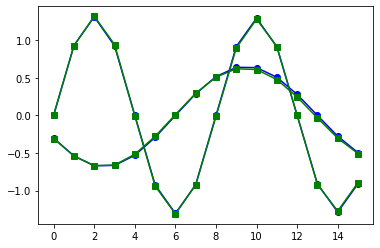

In [7]:
for _ in range(2):
    i = np.random.randint(0, N)
    plt.plot(y_test[i, :], 'o-b')
    plt.plot(y_pred[i, :], 's-g')
plt.show()